In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_mel.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_mel.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_mel.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_mel.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 1), (4499, 1), (4233, 2), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test) 

In [6]:
X_test = X_test.iloc[:,1:2]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0],1, 1, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)


In [7]:
#builing our CNN model
#forming model
model=Sequential()


model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(1,1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, decay=0.0, nesterov=False)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt_rmp = tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 1, 64)          1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 1, 64)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 1, 64)          256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 128)         204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 1, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1, 128)         5

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 1, 64)          1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 1, 64)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 1, 64)          256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 128)         204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 1, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1, 128)         5

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4499, 1, 1, 1), (4233, 1, 1, 1), (4499, 10), (4233, 10))

In [10]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 120
num_batch_size = 64


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model_mel = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/120
71/71 [==============================] - 5s 29ms/step - loss: 2.2434 - accuracy: 0.1640 - val_loss: 2.2910 - val_accuracy: 0.1070

Epoch 00001: val_loss improved from inf to 2.29099, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 2/120
71/71 [==============================] - 2s 28ms/step - loss: 2.1962 - accuracy: 0.1809 - val_loss: 2.2900 - val_accuracy: 0.1077

Epoch 00002: val_loss improved from 2.29099 to 2.28998, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 3/120
71/71 [==============================] - 1s 16ms/step - loss: 2.1826 - accuracy: 0.1860 - val_loss: 2.2823 - val_accuracy: 0.1089

Epoch 00003: val_loss improved from 2.28998 to 2.28228, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 4/120
71/71 [==============================] - 1s 17ms/step - loss: 2.1732 - accuracy: 0.1920 - val_loss: 2.2712 - val_accuracy: 0.1094

Epoch 00004: val_loss improved from 2.28228 to 2.27124, saving model to saved_models\weights.

71/71 [==============================] - 1s 15ms/step - loss: 2.1326 - accuracy: 0.2092 - val_loss: 2.2066 - val_accuracy: 0.1753

Epoch 00038: val_loss did not improve from 2.16948
Epoch 39/120
71/71 [==============================] - 1s 15ms/step - loss: 2.1207 - accuracy: 0.2087 - val_loss: 2.1813 - val_accuracy: 0.1954

Epoch 00039: val_loss did not improve from 2.16948
Epoch 40/120
71/71 [==============================] - 1s 15ms/step - loss: 2.1300 - accuracy: 0.2118 - val_loss: 2.2117 - val_accuracy: 0.1746

Epoch 00040: val_loss did not improve from 2.16948
Epoch 41/120
71/71 [==============================] - 1s 15ms/step - loss: 2.1232 - accuracy: 0.2125 - val_loss: 2.2033 - val_accuracy: 0.1892

Epoch 00041: val_loss did not improve from 2.16948
Epoch 42/120
71/71 [==============================] - 1s 15ms/step - loss: 2.1327 - accuracy: 0.2047 - val_loss: 2.2352 - val_accuracy: 0.1736

Epoch 00042: val_loss did not improve from 2.16948
Epoch 43/120
71/71 [==================

71/71 [==============================] - 1s 15ms/step - loss: 2.1120 - accuracy: 0.2169 - val_loss: 2.2089 - val_accuracy: 0.1777

Epoch 00080: val_loss did not improve from 2.16948
Epoch 81/120
71/71 [==============================] - 1s 15ms/step - loss: 2.1174 - accuracy: 0.2145 - val_loss: 2.2268 - val_accuracy: 0.1784

Epoch 00081: val_loss did not improve from 2.16948
Epoch 82/120
71/71 [==============================] - 1s 18ms/step - loss: 2.1106 - accuracy: 0.2132 - val_loss: 2.2094 - val_accuracy: 0.1878

Epoch 00082: val_loss did not improve from 2.16948
Epoch 83/120
71/71 [==============================] - 1s 16ms/step - loss: 2.1130 - accuracy: 0.2209 - val_loss: 2.1956 - val_accuracy: 0.1966

Epoch 00083: val_loss did not improve from 2.16948
Epoch 84/120
71/71 [==============================] - 1s 16ms/step - loss: 2.1133 - accuracy: 0.2196 - val_loss: 2.1869 - val_accuracy: 0.1987

Epoch 00084: val_loss did not improve from 2.16948
Epoch 85/120
71/71 [==================

In [12]:
# Evaluating the model on the training and testing set

score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.2078239619731903
Testing Accuracy:  0.18426647782325745


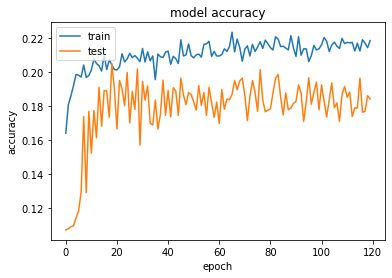

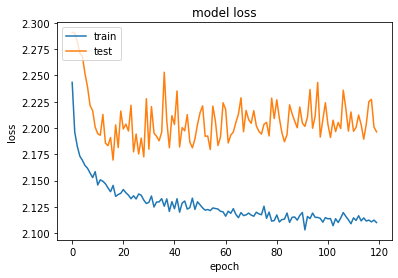

In [13]:
# summarize history for accuracy
plt.plot(model_mel.history['accuracy'])
plt.plot(model_mel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_mel.history['loss'])
plt.plot(model_mel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
train_hist = pd.DataFrame(model_mel.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.243393,0.164036,2.290986,0.107016
1,2.196183,0.180929,2.289985,0.107725
2,2.182627,0.186041,2.282282,0.108906
3,2.173218,0.192043,2.271241,0.109379
4,2.169247,0.198711,2.268391,0.114103
...,...,...,...,...
115,2.111553,0.212492,2.203803,0.196551
116,2.112462,0.219160,2.225005,0.176471
117,2.110796,0.217159,2.227187,0.176943
118,2.112423,0.214492,2.200927,0.186156


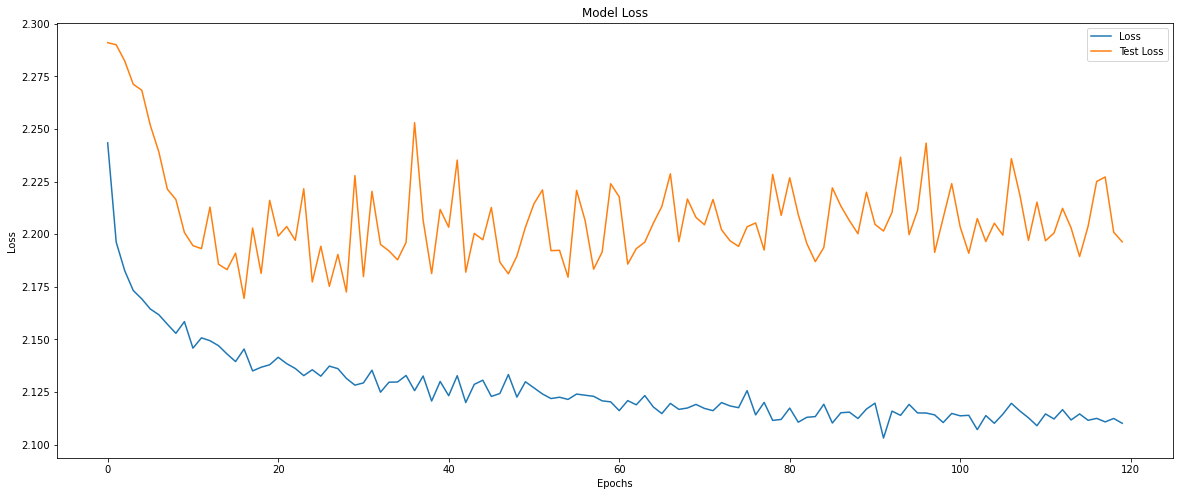

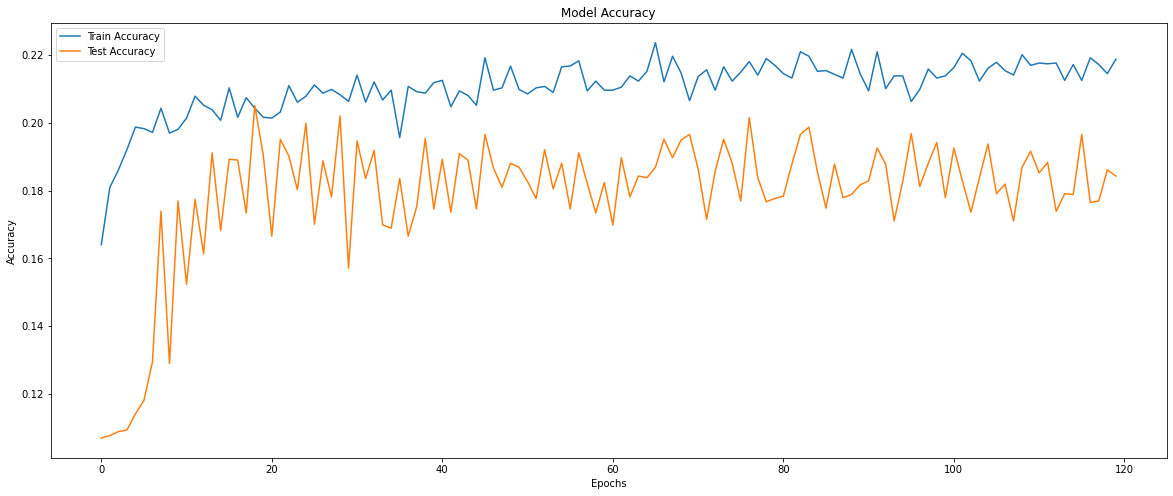

In [15]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [16]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[ 58   0 162   0   0 112   0 163   5   0]
 [ 33   0  38   1   0  44   0  99   6   0]
 [ 11   0 387   0   0  64   0  28  10   0]
 [ 43   0 206  13   0  81   1 121  35   0]
 [ 65   0 137   1   0 143   0 150   4   0]
 [ 32   0 149  55   0 120   3  66  58   0]
 [ 13   0  41   7   0  20   2  54  47   0]
 [ 62   0 165   0   0 112   0 109   4   0]
 [ 20   0 179   1   0  45   4  53  91   0]
 [ 84   0 129   9   0  99   1 145  33   0]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.14      0.12      0.13       500
           1       0.00      0.00      0.00       221
           2       0.24      0.77      0.37       500
           3       0.15      0.03      0.04       500
           4       0.00      0.00      0.00       500
           5       0.14      0.25      0.18       483
           6       0.18      0.01      0.02       184
           7       0.11      0.24      0.15       452
           8       0.31      0.

C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta